In [2]:
#Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Read BDI Historical Data File

df_hist = pd.read_csv("Baltic Dry Index Historical Data.csv")
df_hist.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Baltic Dry Index Historical Data.csv'

In [ ]:
#Read DAILY BDI 
df_daily = pd.read_csv("DAILY Baltic Dry Index Historical Data.csv")
df_daily.count()

Date        5000
Price       5000
Open        5000
High        5000
Low         5000
Vol.           0
Change %    5000
dtype: int64

In [ ]:
#Read WEEKLY BDI
df_weekly=pd.read_csv("Weekly Baltic Dry Index Historical Data.csv")
df_weekly.count()


Date        1440
Price       1440
Open        1440
High        1440
Low         1440
Vol.           0
Change %    1440
dtype: int64

In [13]:
#Importing CSV of the China Industrial Production Index
df_CIP=pd.read_csv("/Users/sagarsaccount/bdi_predict/raw_data/redundant_data/BDI_Data/KEY China Industrial Production Index/Investing.com/China Industrial Production, Yoy.csv")


In [14]:
#Dropping NAN Columns 
df_CIP.head()
df_CIP=df_CIP.drop(columns=['Unnamed: 0','Unnamed: 6'])

In [15]:
df_CIP.head()

,Release Date,Time,Actual,Forecast,Previous
0,"Oct 23, 2022 (Sep)",21:00,6.3%,4.5%,4.2%
1,"Sep 15, 2022 (Aug)",21:00,4.2%,3.8%,3.8%
2,"Aug 14, 2022 (Jul)",21:00,3.8%,4.6%,3.9%
3,"Jul 14, 2022 (Jun)",21:00,3.9%,4.1%,0.7%
4,"Jun 14, 2022 (May)",21:00,0.7%,-0.7%,-2.9%


In [16]:
df_CIP.fillna(' ', inplace=True)
df_CIP

,Release Date,Time,Actual,Forecast,Previous
0,"Oct 23, 2022 (Sep)",21:00,6.3%,4.5%,4.2%
1,"Sep 15, 2022 (Aug)",21:00,4.2%,3.8%,3.8%
2,"Aug 14, 2022 (Jul)",21:00,3.8%,4.6%,3.9%
3,"Jul 14, 2022 (Jun)",21:00,3.9%,4.1%,0.7%
4,"Jun 14, 2022 (May)",21:00,0.7%,-0.7%,-2.9%
...,...,...,...,...,...
313,"May 01, 1995 (Apr)",04:00,15.40%,,16.40%
314,"Apr 01, 1995 (Mar)",04:00,16.40%,,15.50%
315,"Mar 01, 1995 (Feb)",04:00,15.50%,,11.40%
316,"Feb 01, 1995 (Jan)",04:00,11.40%,,18.50%


In [17]:
#Creating a Data Frame of the Actual CIP Rate
df_CIP_actual = df_CIP[['Release Date','Time', 'Actual']]
df_CIP_actual

,Release Date,Time,Actual
0,"Oct 23, 2022 (Sep)",21:00,6.3%
1,"Sep 15, 2022 (Aug)",21:00,4.2%
2,"Aug 14, 2022 (Jul)",21:00,3.8%
3,"Jul 14, 2022 (Jun)",21:00,3.9%
4,"Jun 14, 2022 (May)",21:00,0.7%
...,...,...,...
313,"May 01, 1995 (Apr)",04:00,15.40%
314,"Apr 01, 1995 (Mar)",04:00,16.40%
315,"Mar 01, 1995 (Feb)",04:00,15.50%
316,"Feb 01, 1995 (Jan)",04:00,11.40%


In [20]:
CIP=pd.read_csv("/Users/sagarsaccount/bdi_predict/raw_data/redundant_data/BDI_Data/KEY China Industrial Production Index/Investing.com/ECONOMICS_CNIPYY, M.csv")
CIP.head()

,time,open,high,low,close,Volume,Volume MA
0,631152000,-21.1,-21.1,-21.1,-21.1,NaN,NaN
1,633830400,5.0,5.0,5.0,5.0,NaN,NaN
2,636249600,0.8,0.8,0.8,0.8,NaN,NaN
3,638928000,1.7,1.7,1.7,1.7,NaN,NaN
4,641520000,3.3,3.3,3.3,3.3,NaN,NaN


In [21]:
CIP['time']=pd.to_datetime(CIP['time'].astype(int), unit='s')

CIP=CIP.drop(columns=['Volume', 'Volume MA'])


In [22]:
#CIP index close
CIP_close=CIP.drop(columns=['open','high','low'])
CIP_close

,time,close
0,1990-01-01,-21.1
1,1990-02-01,5.0
2,1990-03-01,0.8
3,1990-04-01,1.7
4,1990-05-01,3.3
...,...,...
389,2022-06-01,3.9
390,2022-07-01,3.8
391,2022-08-01,4.2
392,2022-09-01,6.3


In [23]:
CIP_df =CIP_close[CIP_close['time']>'1994-12-01']


In [24]:
CIP_df.head(3)

,time,close
60,1995-01-01,11.4
61,1995-02-01,15.5
62,1995-03-01,16.4


In [25]:
CIP_df.set_index('time', inplace=True)

In [26]:
CIP_df.head(3)

,close
time,
1995-01-01,11.4
1995-02-01,15.5
1995-03-01,16.4


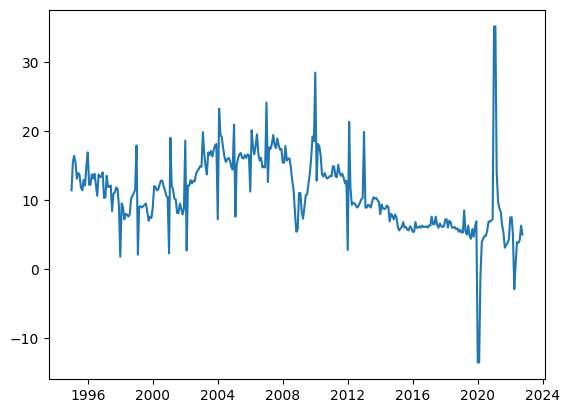

In [27]:
plt.plot(CIP_df)

In [28]:
#Creating Nan values to interpolate weekly data
datetime_index = pd.date_range(start="1995-01-01", end="2021-12-01", name="time")
CIP=pd.DataFrame(index=datetime_index)

In [29]:
CIP['CIP']=CIP_df['close']

In [30]:
#The CIP table assigned to Date Time
CIP

,CIP
time,
1995-01-01,11.4
1995-01-02,NaN
1995-01-03,NaN
1995-01-04,NaN
1995-01-05,NaN
...,...
2021-11-27,NaN
2021-11-28,NaN
2021-11-29,NaN


In [31]:
#Polynomial Interpolation of the CIP rate
CIP.interpolate(method='polynomial', order=3, inplace=True)


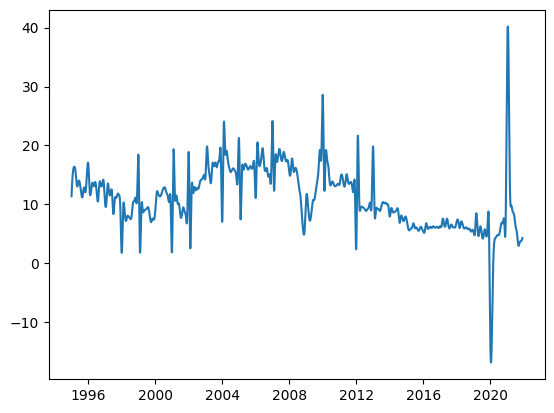

In [32]:
#Plot of the interpolated CIP
plt.plot(CIP)

In [33]:
CIP.to_csv()

'time,CIP\n1995-01-01,11.4\n1995-01-02,11.60121775625521\n1995-01-03,11.797236411258092\n1995-01-04,11.988118218988273\n1995-01-05,12.17392543342538\n1995-01-06,12.354720308549037\n1995-01-07,12.530565098338876\n1995-01-08,12.701522056774515\n1995-01-09,12.867653437835592\n1995-01-10,13.029021495501722\n1995-01-11,13.185688483752537\n1995-01-12,13.337716656567663\n1995-01-13,13.485168267926726\n1995-01-14,13.62810557180935\n1995-01-15,13.766590822195164\n1995-01-16,13.900686273063798\n1995-01-17,14.03045417839487\n1995-01-18,14.155956792168011\n1995-01-19,14.277256368362847\n1995-01-20,14.394415160959008\n1995-01-21,14.507495423936113\n1995-01-22,14.616559411273794\n1995-01-23,14.72166937695168\n1995-01-24,14.822887574949386\n1995-01-25,14.920276259246549\n1995-01-26,15.01389768382279\n1995-01-27,15.103814102657736\n1995-01-28,15.190087769731022\n1995-01-29,15.272780939022262\n1995-01-30,15.351955864511089\n1995-01-31,15.427674800177124\n1995-02-01,15.5\n1995-02-02,15.568993717959343\n